Accuracy: 0.7594476744186046
Confusion Matrix:
[[1732  345]
 [ 648 1403]]


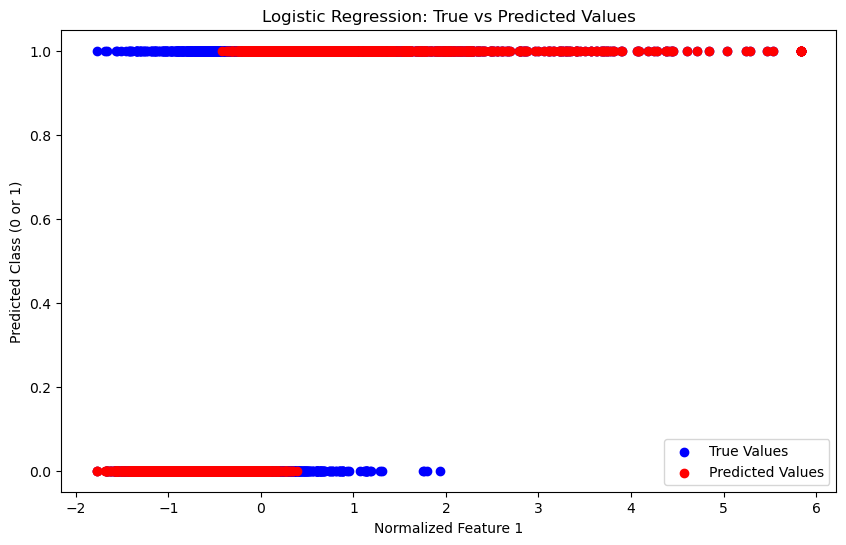

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the California Housing dataset
dataset = fetch_california_housing()

# Create a DataFrame
data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
data['Target'] = dataset.target

# Binarize the target: Classify as 1 if above the median price, otherwise 0

median_price = data['Target'].median()
data['Target'] = (data['Target'] > median_price).astype(int)

# Split data into features and target
X = data.drop(columns=['Target'])
y = data['Target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Implementation with Gradient Descent
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Number of samples and features
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)

        for epoch in range(self.epochs):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid function
            y_pred = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Linear model + sigmoid
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        # Convert probabilities to binary output
        return [1 if i > 0.5 else 0 for i in y_pred]

# Instantiate the model
model = LogisticRegressionGD(learning_rate=0.01, epochs=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize results for a single feature
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='True Values')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted Values')
plt.xlabel('Normalized Feature 1')
plt.ylabel('Predicted Class (0 or 1)')
plt.title('Logistic Regression: True vs Predicted Values')
plt.legend()
plt.show()
